In [5]:
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 20
import warnings
import itertools
warnings.filterwarnings("ignore")

# **Dataset Cleaning and Visualization**

In [13]:
df = pd.read_csv("MER_T12_06.csv")
df.head()

MSN  YYYYMM   Value  Column_Order  \
0  CLEIEUS  197301  72.076             1   
1  CLEIEUS  197302  64.442             1   
2  CLEIEUS  197303  64.084             1   
3  CLEIEUS  197304  60.842             1   
4  CLEIEUS  197305  61.798             1   

                                Description  \
0  Coal Electric Power Sector CO2 Emissions   
1  Coal Electric Power Sector CO2 Emissions   
2  Coal Electric Power Sector CO2 Emissions   
3  Coal Electric Power Sector CO2 Emissions   
4  Coal Electric Power Sector CO2 Emissions   

                                    Unit  
0  Million Metric Tons of Carbon Dioxide  
1  Million Metric Tons of Carbon Dioxide  
2  Million Metric Tons of Carbon Dioxide  
3  Million Metric Tons of Carbon Dioxide  
4  Million Metric Tons of Carbon Dioxide

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5094 non-null   object
 1   YYYYMM        5094 non-null   int64 
 2   Value         5094 non-null   object
 3   Column_Order  5094 non-null   int64 
 4   Description   5094 non-null   object
 5   Unit          5094 non-null   object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB


In [21]:
# Changing Month from int to Date
dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce') #coerce to have a NaN field in empty or corrupted
df = pd.read_csv("MER_T12_06.csv", parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=dateparse)
df.head()

MSN   Value  Column_Order  \
YYYYMM                                      
1973-01-01  CLEIEUS  72.076             1   
1973-02-01  CLEIEUS  64.442             1   
1973-03-01  CLEIEUS  64.084             1   
1973-04-01  CLEIEUS  60.842             1   
1973-05-01  CLEIEUS  61.798             1   

                                         Description  \
YYYYMM                                                 
1973-01-01  Coal Electric Power Sector CO2 Emissions   
1973-02-01  Coal Electric Power Sector CO2 Emissions   
1973-03-01  Coal Electric Power Sector CO2 Emissions   
1973-04-01  Coal Electric Power Sector CO2 Emissions   
1973-05-01  Coal Electric Power Sector CO2 Emissions   

                                             Unit  
YYYYMM                                             
1973-01-01  Million Metric Tons of Carbon Dioxide  
1973-02-01  Million Metric Tons of Carbon Dioxide  
1973-03-01  Million Metric Tons of Carbon Dioxide  
1973-04-01  Million Metric Tons of Carbon Dioxide  
1973-05-01  Million Metric Tons of Carbon Dioxide

In [22]:
#drop rows with null index
#ts = time serie
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts.head(15)

MSN   Value  Column_Order  \
YYYYMM                                      
1973-01-01  CLEIEUS  72.076             1   
1973-02-01  CLEIEUS  64.442             1   
1973-03-01  CLEIEUS  64.084             1   
1973-04-01  CLEIEUS  60.842             1   
1973-05-01  CLEIEUS  61.798             1   
1973-06-01  CLEIEUS  66.538             1   
1973-07-01  CLEIEUS  72.626             1   
1973-08-01  CLEIEUS  75.181             1   
1973-09-01  CLEIEUS  68.397             1   
1973-10-01  CLEIEUS  67.668             1   
1973-11-01  CLEIEUS  67.021             1   
1973-12-01  CLEIEUS  71.118             1   
1974-01-01  CLEIEUS   70.55             1   
1974-02-01  CLEIEUS  62.929             1   
1974-03-01  CLEIEUS  64.519             1   

                                         Description  \
YYYYMM                                                 
1973-01-01  Coal Electric Power Sector CO2 Emissions   
1973-02-01  Coal Electric Power Sector CO2 Emissions   
1973-03-01  Coal Electric Power Sector CO2 Emissions   
1973-04-01  Coal Electric Power Sector CO2 Emissions   
1973-05-01  Coal Electric Power Sector CO2 Emissions   
1973-06-01  Coal Electric Power Sector CO2 Emissions   
1973-07-01  Coal Electric Power Sector CO2 Emissions   
1973-08-01  Coal Electric Power Sector CO2 Emissions   
1973-09-01  Coal Electric Power Sector CO2 Emissions   
1973-10-01  Coal Electric Power Sector CO2 Emissions   
1973-11-01  Coal Electric Power Sector CO2 Emissions   
1973-12-01  Coal Electric Power Sector CO2 Emissions   
1974-01-01  Coal Electric Power Sector CO2 Emissions   
1974-02-01  Coal Electric Power Sector CO2 Emissions   
1974-03-01  Coal Electric Power Sector CO2 Emissions   

                                             Unit  
YYYYMM                                             
1973-01-01  Million Metric Tons of Carbon Dioxide  
1973-02-01  Million Metric Tons of Carbon Dioxide  
1973-03-01  Million Metric Tons of Carbon Dioxide  
1973-04-01  Million Metric Tons of Carbon Dioxide  
1973-05-01  Million Metric Tons of Carbon Dioxide  
1973-06-01  Million Metric Tons of Carbon Dioxide  
1973-07-01  Million Metric Tons of Carbon Dioxide  
1973-08-01  Million Metric Tons of Carbon Dioxide  
1973-09-01  Million Metric Tons of Carbon Dioxide  
1973-10-01  Million Metric Tons of Carbon Dioxide  
1973-11-01  Million Metric Tons of Carbon Dioxide  
1973-12-01  Million Metric Tons of Carbon Dioxide  
1974-01-01  Million Metric Tons of Carbon Dioxide  
1974-02-01  Million Metric Tons of Carbon Dioxide  
1974-03-01  Million Metric Tons of Carbon Dioxide

In [23]:
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts.head(15)

MSN   Value  Column_Order  \
YYYYMM                                      
1973-01-01  CLEIEUS  72.076             1   
1973-02-01  CLEIEUS  64.442             1   
1973-03-01  CLEIEUS  64.084             1   
1973-04-01  CLEIEUS  60.842             1   
1973-05-01  CLEIEUS  61.798             1   
1973-06-01  CLEIEUS  66.538             1   
1973-07-01  CLEIEUS  72.626             1   
1973-08-01  CLEIEUS  75.181             1   
1973-09-01  CLEIEUS  68.397             1   
1973-10-01  CLEIEUS  67.668             1   
1973-11-01  CLEIEUS  67.021             1   
1973-12-01  CLEIEUS  71.118             1   
1974-01-01  CLEIEUS   70.55             1   
1974-02-01  CLEIEUS  62.929             1   
1974-03-01  CLEIEUS  64.519             1   

                                         Description  \
YYYYMM                                                 
1973-01-01  Coal Electric Power Sector CO2 Emissions   
1973-02-01  Coal Electric Power Sector CO2 Emissions   
1973-03-01  Coal Electric Power Sector CO2 Emissions   
1973-04-01  Coal Electric Power Sector CO2 Emissions   
1973-05-01  Coal Electric Power Sector CO2 Emissions   
1973-06-01  Coal Electric Power Sector CO2 Emissions   
1973-07-01  Coal Electric Power Sector CO2 Emissions   
1973-08-01  Coal Electric Power Sector CO2 Emissions   
1973-09-01  Coal Electric Power Sector CO2 Emissions   
1973-10-01  Coal Electric Power Sector CO2 Emissions   
1973-11-01  Coal Electric Power Sector CO2 Emissions   
1973-12-01  Coal Electric Power Sector CO2 Emissions   
1974-01-01  Coal Electric Power Sector CO2 Emissions   
1974-02-01  Coal Electric Power Sector CO2 Emissions   
1974-03-01  Coal Electric Power Sector CO2 Emissions   

                                             Unit  
YYYYMM                                             
1973-01-01  Million Metric Tons of Carbon Dioxide  
1973-02-01  Million Metric Tons of Carbon Dioxide  
1973-03-01  Million Metric Tons of Carbon Dioxide  
1973-04-01  Million Metric Tons of Carbon Dioxide  
1973-05-01  Million Metric Tons of Carbon Dioxide  
1973-06-01  Million Metric Tons of Carbon Dioxide  
1973-07-01  Million Metric Tons of Carbon Dioxide  
1973-08-01  Million Metric Tons of Carbon Dioxide  
1973-09-01  Million Metric Tons of Carbon Dioxide  
1973-10-01  Million Metric Tons of Carbon Dioxide  
1973-11-01  Million Metric Tons of Carbon Dioxide  
1973-12-01  Million Metric Tons of Carbon Dioxide  
1974-01-01  Million Metric Tons of Carbon Dioxide  
1974-02-01  Million Metric Tons of Carbon Dioxide  
1974-03-01  Million Metric Tons of Carbon Dioxide

In [24]:
ts['Value'] = pd.to_numeric(ts['Value'] , errors='coerce')
ts.head()

MSN   Value  Column_Order  \
YYYYMM                                      
1973-01-01  CLEIEUS  72.076             1   
1973-02-01  CLEIEUS  64.442             1   
1973-03-01  CLEIEUS  64.084             1   
1973-04-01  CLEIEUS  60.842             1   
1973-05-01  CLEIEUS  61.798             1   

                                         Description  \
YYYYMM                                                 
1973-01-01  Coal Electric Power Sector CO2 Emissions   
1973-02-01  Coal Electric Power Sector CO2 Emissions   
1973-03-01  Coal Electric Power Sector CO2 Emissions   
1973-04-01  Coal Electric Power Sector CO2 Emissions   
1973-05-01  Coal Electric Power Sector CO2 Emissions   

                                             Unit  
YYYYMM                                             
1973-01-01  Million Metric Tons of Carbon Dioxide  
1973-02-01  Million Metric Tons of Carbon Dioxide  
1973-03-01  Million Metric Tons of Carbon Dioxide  
1973-04-01  Million Metric Tons of Carbon Dioxide  
1973-05-01  Million Metric Tons of Carbon Dioxide

In [25]:
ts.dropna(inplace = True)

# **Visualizing the Data**

In [26]:
# sources = CO2 sources
sources = ts.groupby('Description')
ts.head(15)

MSN   Value  Column_Order  \
YYYYMM                                      
1973-01-01  CLEIEUS  72.076             1   
1973-02-01  CLEIEUS  64.442             1   
1973-03-01  CLEIEUS  64.084             1   
1973-04-01  CLEIEUS  60.842             1   
1973-05-01  CLEIEUS  61.798             1   
1973-06-01  CLEIEUS  66.538             1   
1973-07-01  CLEIEUS  72.626             1   
1973-08-01  CLEIEUS  75.181             1   
1973-09-01  CLEIEUS  68.397             1   
1973-10-01  CLEIEUS  67.668             1   
1973-11-01  CLEIEUS  67.021             1   
1973-12-01  CLEIEUS  71.118             1   
1974-01-01  CLEIEUS  70.550             1   
1974-02-01  CLEIEUS  62.929             1   
1974-03-01  CLEIEUS  64.519             1   

                                         Description  \
YYYYMM                                                 
1973-01-01  Coal Electric Power Sector CO2 Emissions   
1973-02-01  Coal Electric Power Sector CO2 Emissions   
1973-03-01  Coal Electric Power Sector CO2 Emissions   
1973-04-01  Coal Electric Power Sector CO2 Emissions   
1973-05-01  Coal Electric Power Sector CO2 Emissions   
1973-06-01  Coal Electric Power Sector CO2 Emissions   
1973-07-01  Coal Electric Power Sector CO2 Emissions   
1973-08-01  Coal Electric Power Sector CO2 Emissions   
1973-09-01  Coal Electric Power Sector CO2 Emissions   
1973-10-01  Coal Electric Power Sector CO2 Emissions   
1973-11-01  Coal Electric Power Sector CO2 Emissions   
1973-12-01  Coal Electric Power Sector CO2 Emissions   
1974-01-01  Coal Electric Power Sector CO2 Emissions   
1974-02-01  Coal Electric Power Sector CO2 Emissions   
1974-03-01  Coal Electric Power Sector CO2 Emissions   

                                             Unit  
YYYYMM                                             
1973-01-01  Million Metric Tons of Carbon Dioxide  
1973-02-01  Million Metric Tons of Carbon Dioxide  
1973-03-01  Million Metric Tons of Carbon Dioxide  
1973-04-01  Million Metric Tons of Carbon Dioxide  
1973-05-01  Million Metric Tons of Carbon Dioxide  
1973-06-01  Million Metric Tons of Carbon Dioxide  
1973-07-01  Million Metric Tons of Carbon Dioxide  
1973-08-01  Million Metric Tons of Carbon Dioxide  
1973-09-01  Million Metric Tons of Carbon Dioxide  
1973-10-01  Million Metric Tons of Carbon Dioxide  
1973-11-01  Million Metric Tons of Carbon Dioxide  
1973-12-01  Million Metric Tons of Carbon Dioxide  
1974-01-01  Million Metric Tons of Carbon Dioxide  
1974-02-01  Million Metric Tons of Carbon Dioxide  
1974-03-01  Million Metric Tons of Carbon Dioxide

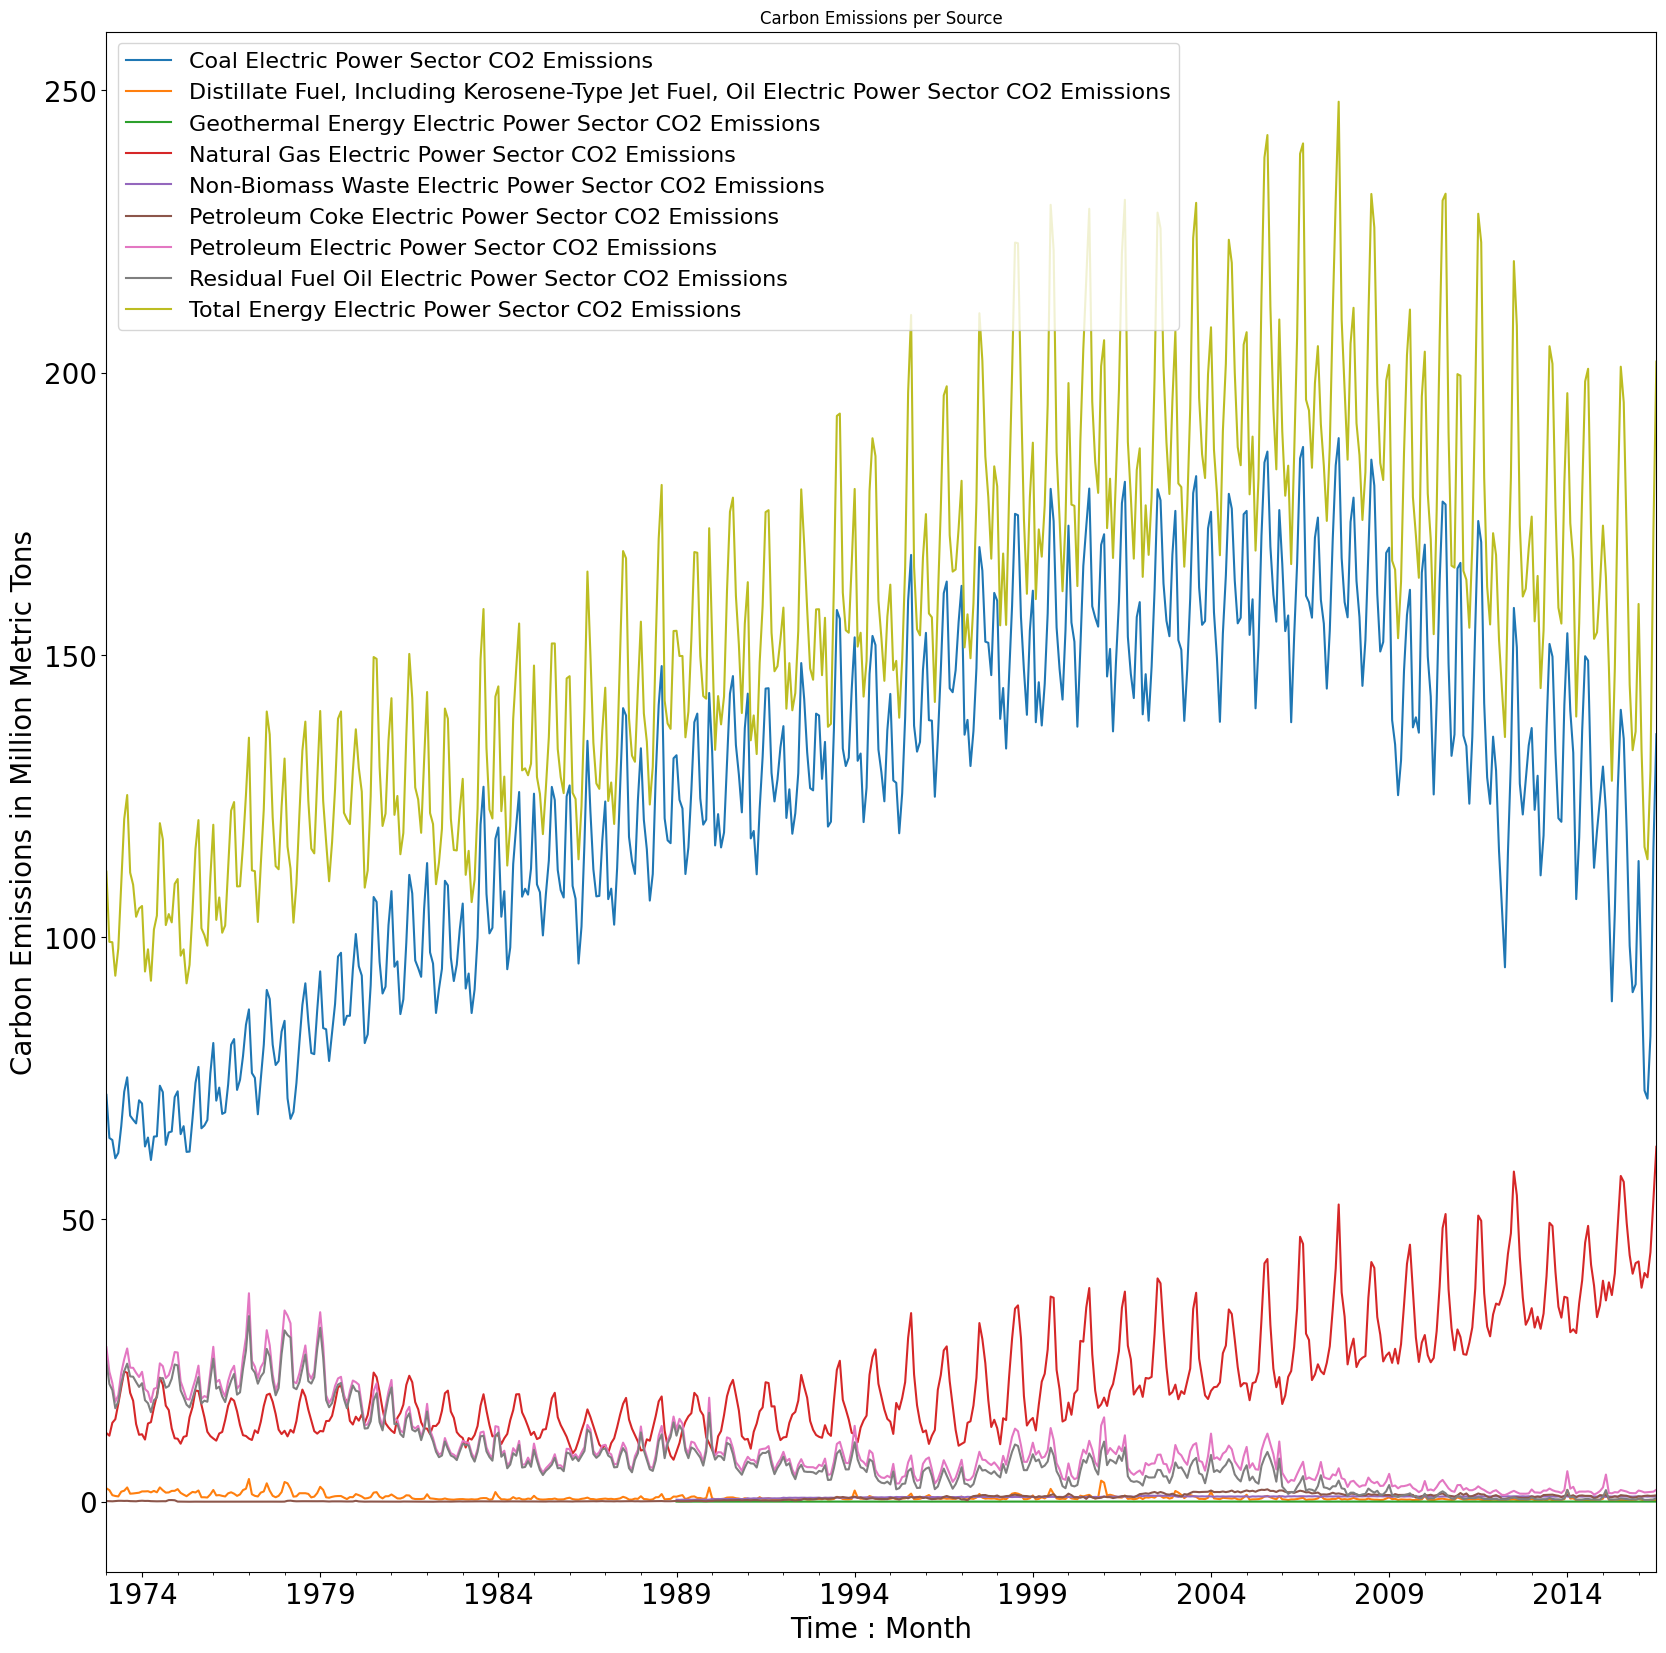

In [27]:
fig, ax = plt.subplots()
for desc, grp in sources:
    grp.plot( y='Value', label=desc,ax = ax, title='Carbon Emissions per Source', fontsize = 20)
    ax.set_xlabel('Time : Month')
    ax.set_ylabel('Carbon Emissions in Million Metric Tons')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.legend(fontsize = 16)

In [28]:
#Plot per Emission source
fig, axes = plt.subplots(3,3, figsize = (40, 40))
for (desc, group), ax in zip(sources, axes.flatten()):
    group.plot(y='Value',ax = ax, title=desc, fontsize = 20)
    ax.set_xlabel('Time : Month')
    ax.set_ylabel('Carbon Emissions in Million Metric Tons')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)

## **CO2 Emissions by Sector**

In [29]:
QuantityPerSource = ts.groupby('Description')['Value'].sum().sort_values()
src = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel ',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Full Emissions']
fig = plt.figure(figsize = (16,9))
x_label = src
x_tick = np.arange(len(src))
plt.bar(x_tick, QuantityPerSource, align = 'center', alpha = 0.7)
fig.suptitle("CO2 Emissions by Sector", fontsize= 25)
plt.xticks(x_tick, x_label, rotation = 80, fontsize = 30 )
plt.yticks(fontsize = 30)
plt.xlabel('Carbon Emissions in Million Metric Tons', fontsize = 30)
plt.show()

### **Will make forecasting for total (full) CO2 emissions**

In [30]:
# ems = emissions
ems = ts.drop(['MSN','Column_Order','Unit'], axis=1)  # dropping columns and letting only value and description column
# total emissions (pte)
pte = ems[ems['Description'] =="Total Energy Electric Power Sector CO2 Emissions"]
pte = pte.drop(['Description'], axis=1)
pte

Value
YYYYMM             
1973-01-01  111.621
1973-02-01   99.185
1973-03-01   99.112
1973-04-01   93.183
1973-05-01   98.012
...             ...
2016-03-01  115.997
2016-04-01  113.815
2016-05-01  129.440
2016-06-01  172.074
2016-07-01  201.958

[523 rows x 1 columns]

# **Cross Validation, Hyperparameter Tuning, and Model Training:**

Stationarity test to see of mean , variance, and covariance are constant over time


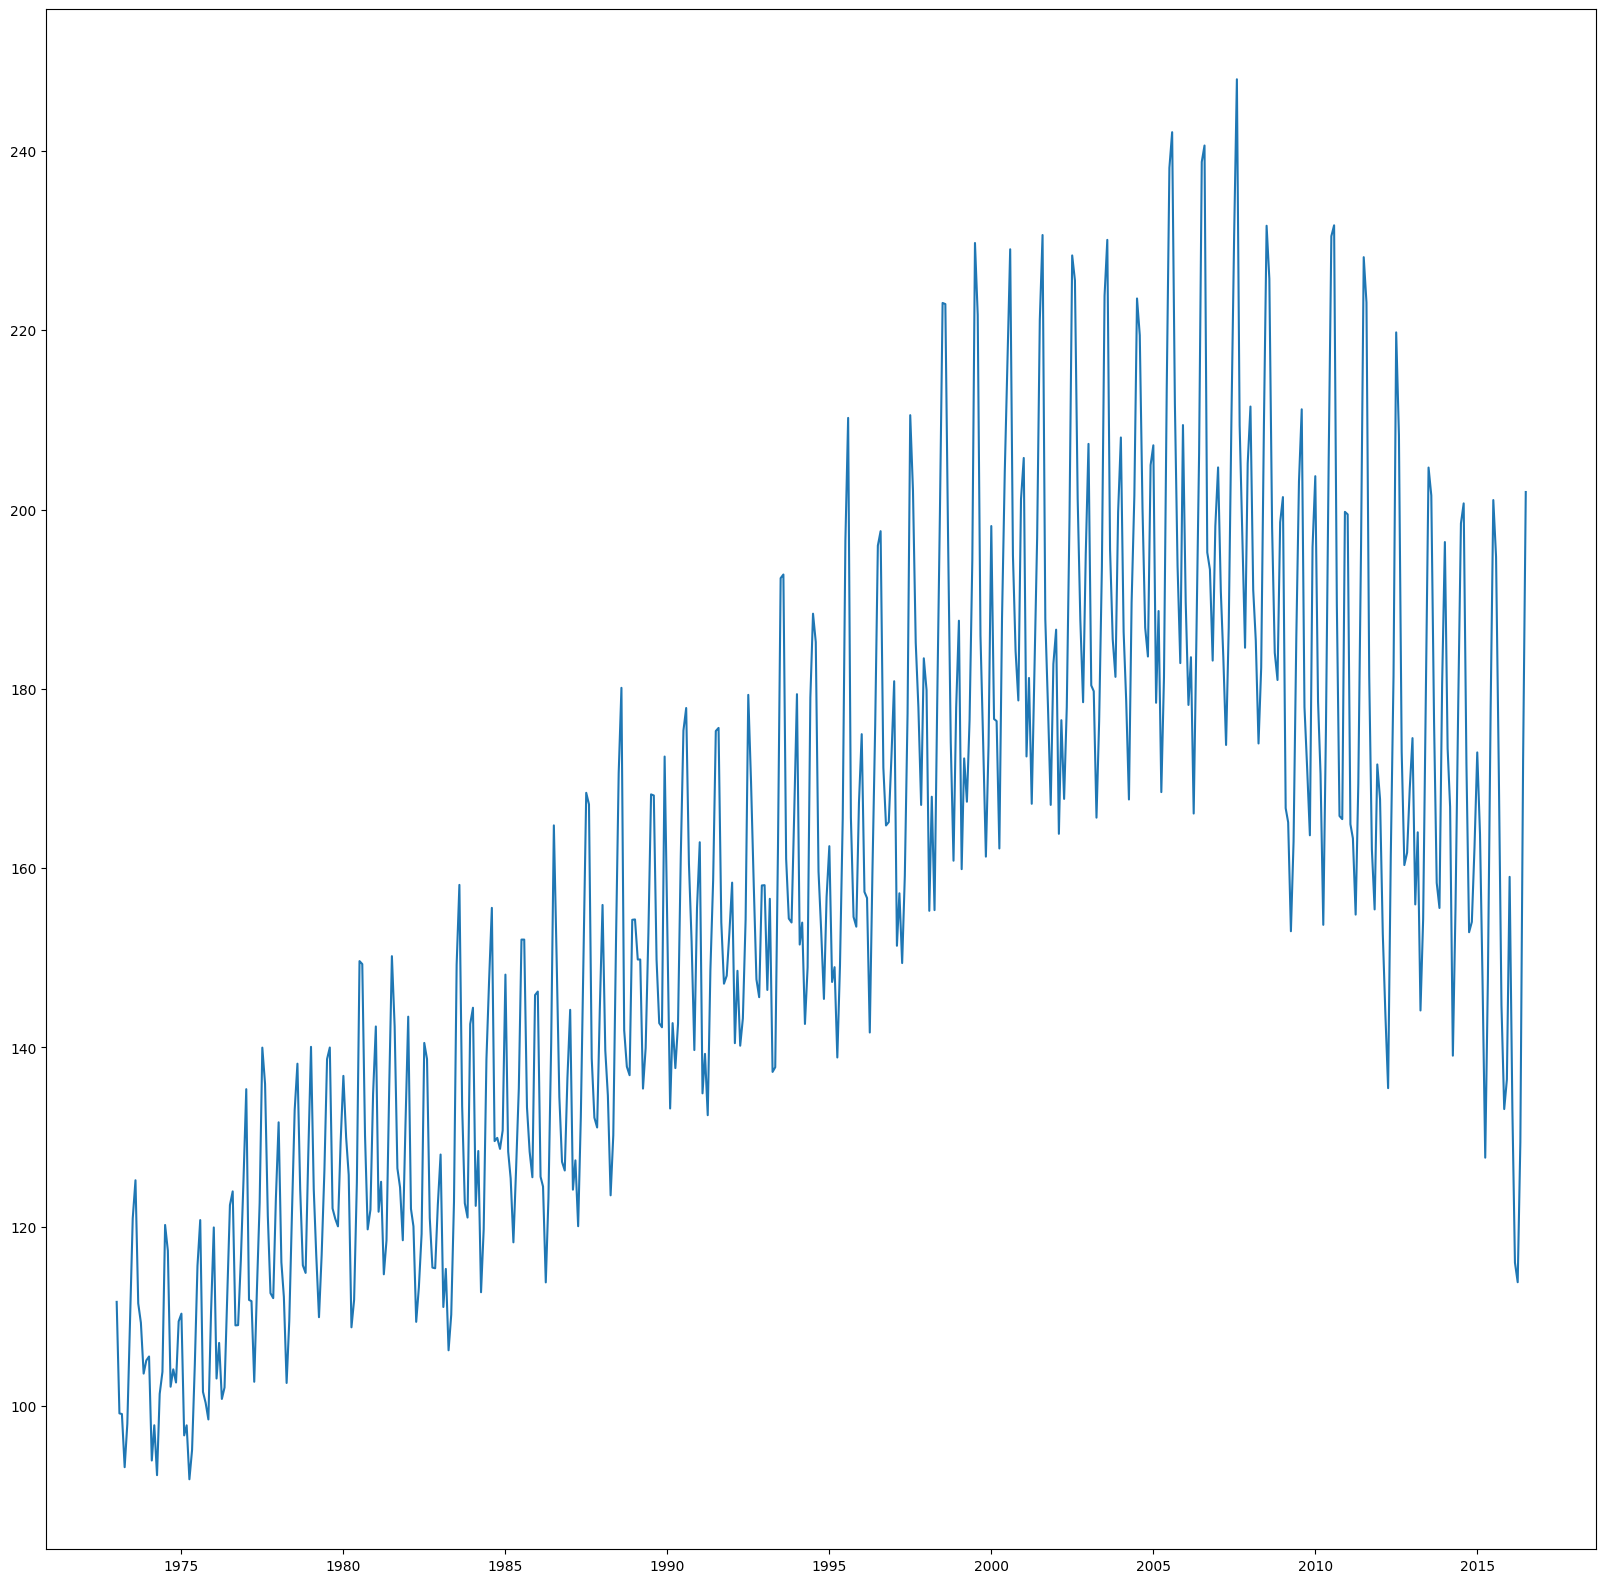

In [31]:
plt.plot(pte)
# same result

trend in the CO2 emission dataset with seasonal variation. Dataset is not stationary.

Test stationary using Dickey-Fuller Augmentation.
The time series is stationary if the p value is low (null by hypothesis) and and if the critical values at confidence intervals of 1%, 5%, 10% are as close as possible to the statistics of the ADF (Augmented Dickey-Fuller)

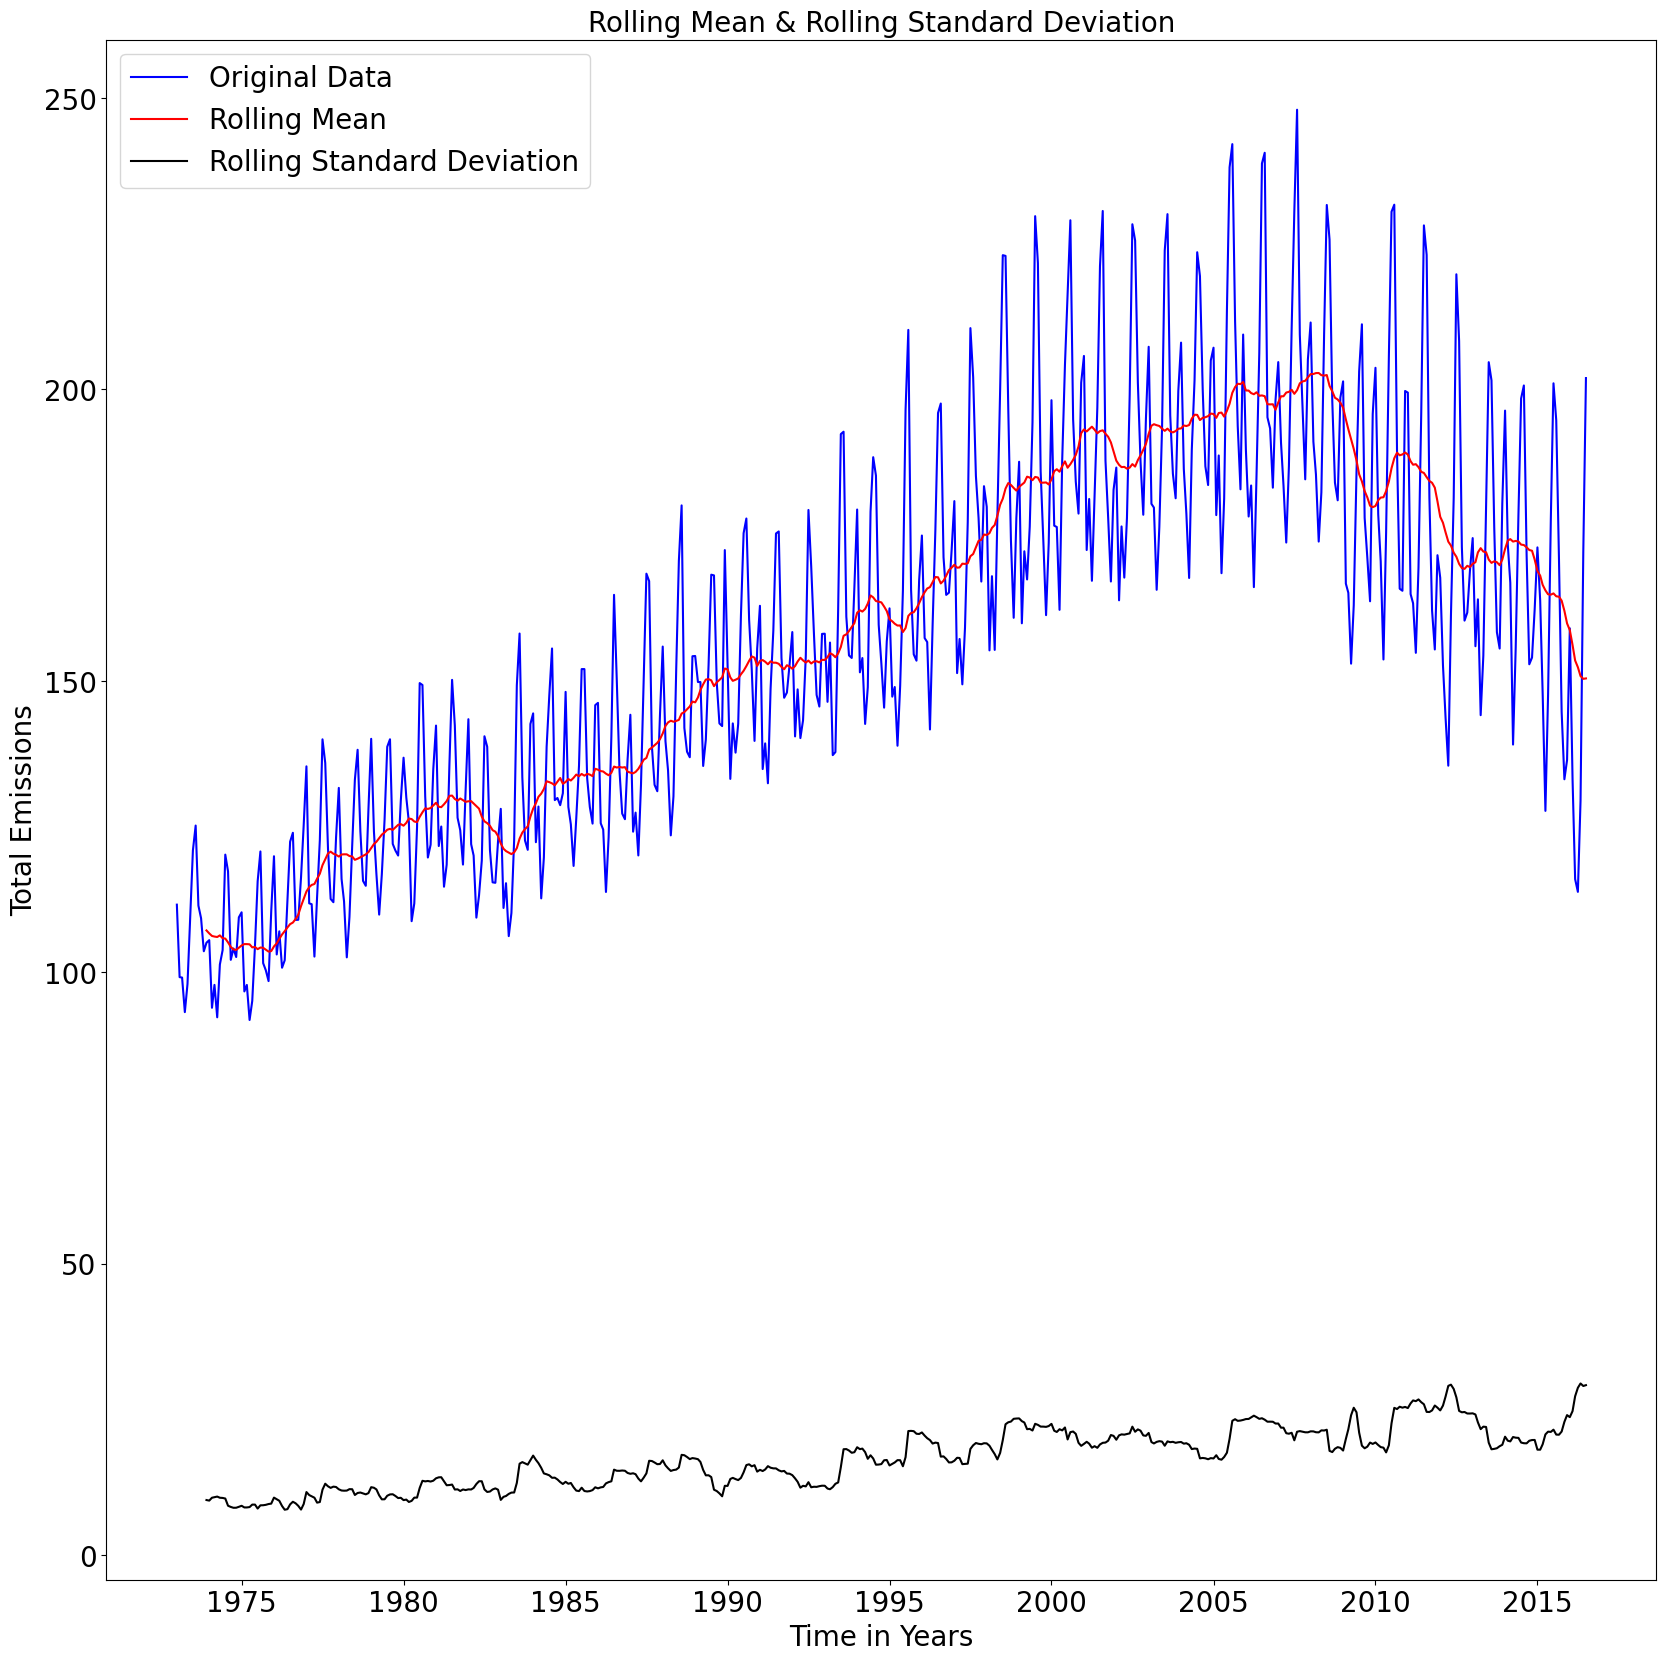

In [32]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
def TestStationaryPlt(pte):
    rolling_mean = pte.rolling(window = 12, center = False).mean()
    rolling_std = pte.rolling(window = 12, center = False).std()
    plt.plot(pte, color = 'blue',label = 'Original Data')
    plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rolling_std, color ='black', label = 'Rolling Standard Deviation')
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.xlabel('Time in Years', fontsize = 20)
    plt.ylabel('Total Emissions', fontsize = 20)
    plt.legend(loc='best', fontsize = 20)
    plt.title('Rolling Mean & Rolling Standard Deviation', fontsize = 20)
    plt.show()
TestStationaryPlt(pte)

In [33]:
def Adf_test(pte):
    result = adfuller(pte['Value'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))
Adf_test(pte)

ADF Statistic: -1.8096272220156844
p-value: 0.37569262885312726
Critical Values:
	1%: -3.44328828958775
	5%: -2.8672462791357867
	10%: -2.569809231353463


The ADF statistic is far from the critical values and the p-value is above the threshold (0.05). We can conclude that the time series is not stationary.To transform the time series to a stationary one, substract the moving average from the original series

In [34]:
moving_avg = pte.rolling(12).mean()
pte_trans = pte - moving_avg
pte_trans.head(13)

Value
YYYYMM              
1973-01-01       NaN
1973-02-01       NaN
1973-03-01       NaN
1973-04-01       NaN
1973-05-01       NaN
1973-06-01       NaN
1973-07-01       NaN
1973-08-01       NaN
1973-09-01       NaN
1973-10-01       NaN
1973-11-01       NaN
1973-12-01 -2.107083
1974-01-01 -1.158500

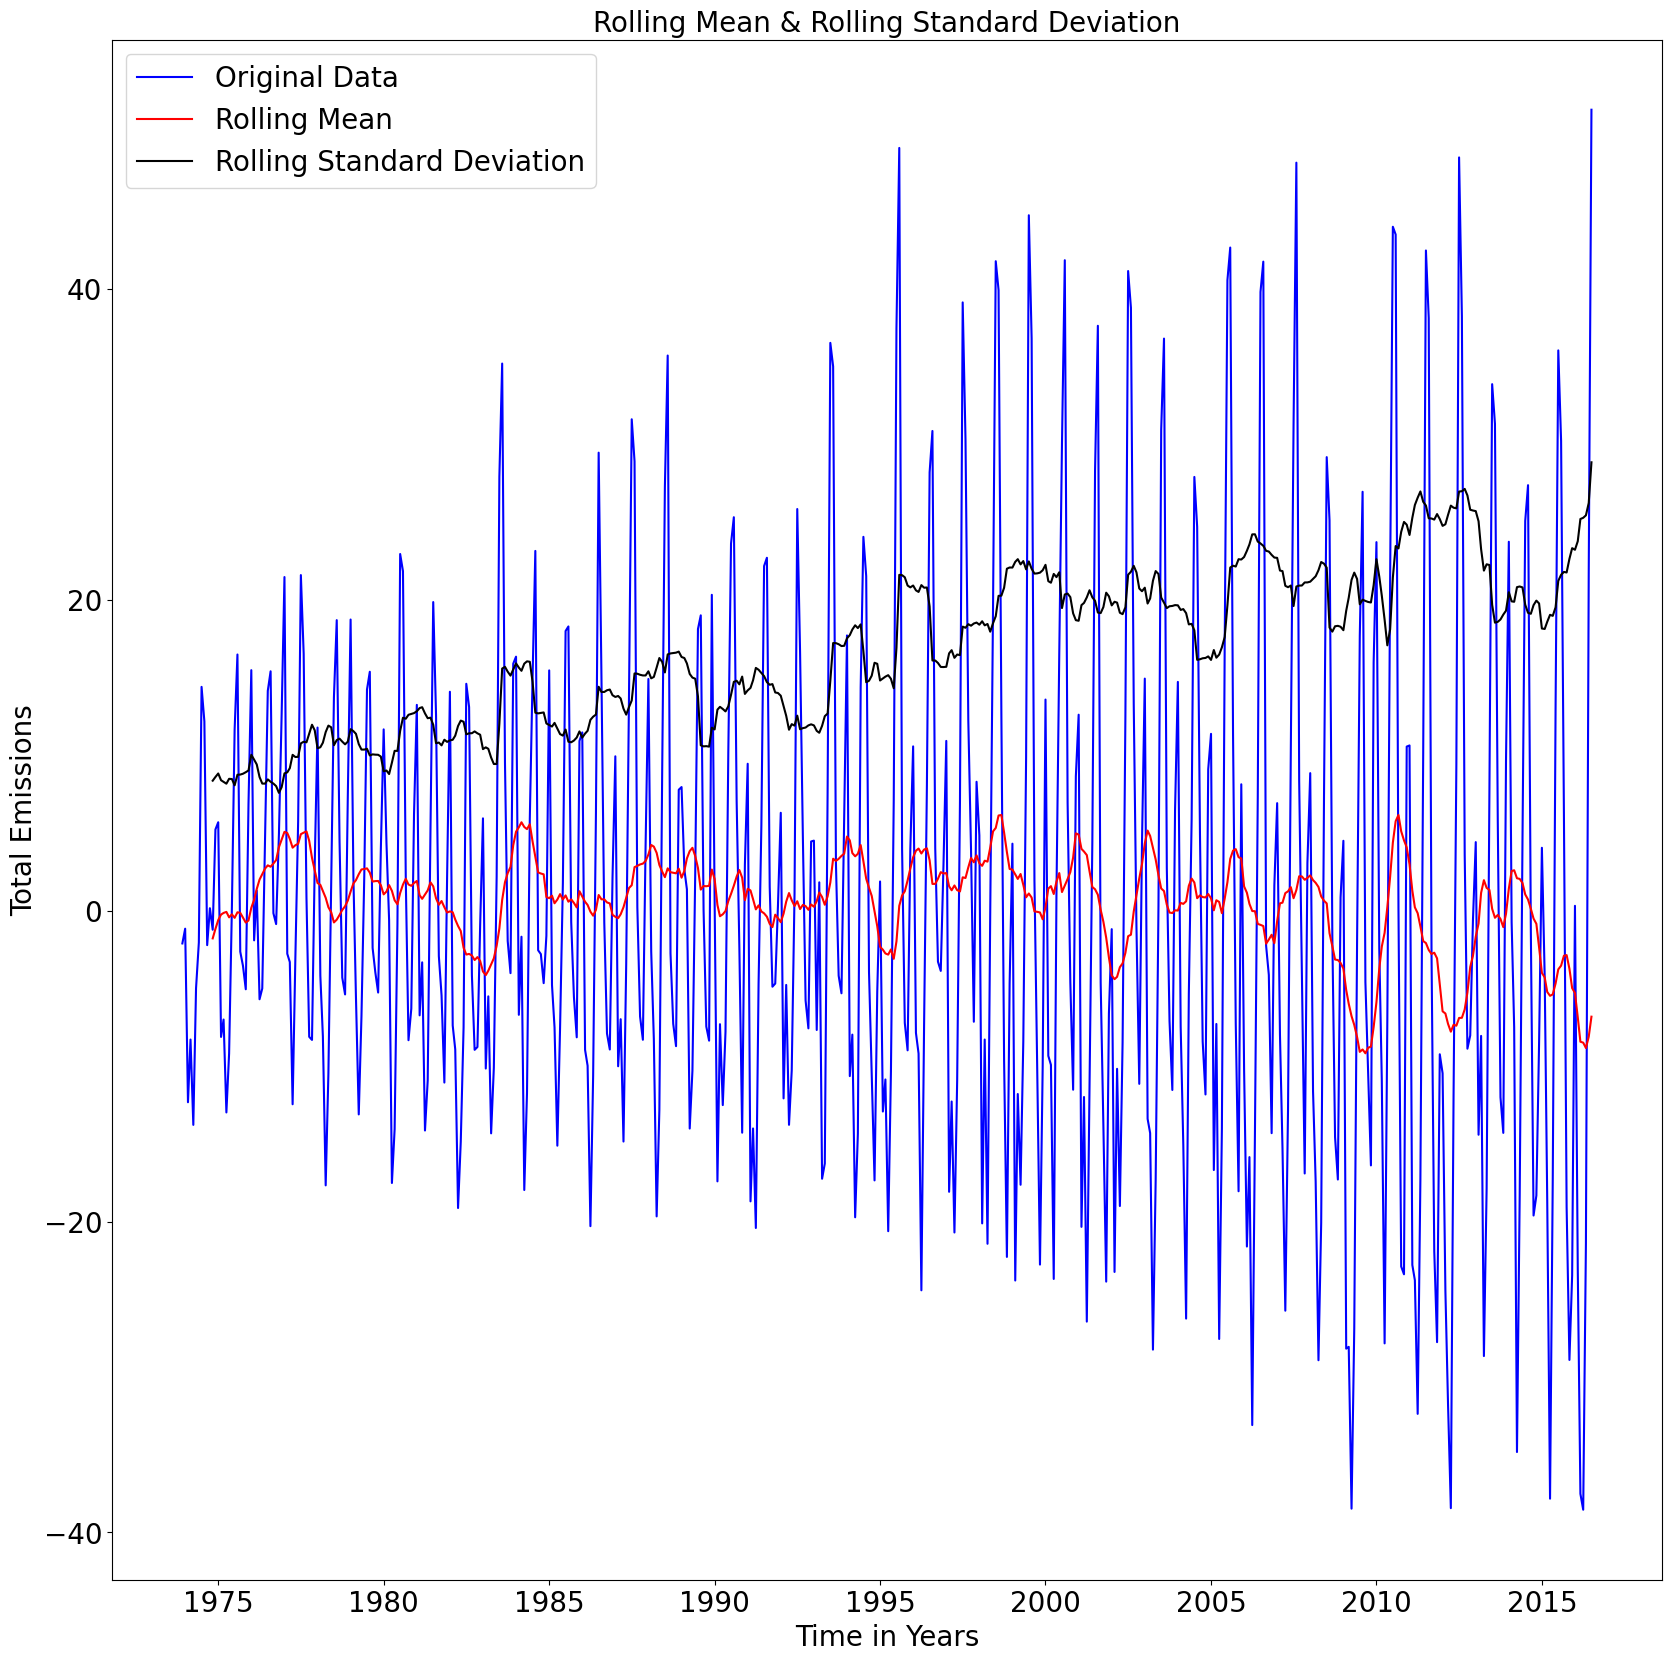

In [35]:
pte_trans.dropna(inplace=True)
TestStationaryPlt(pte_trans)

In [36]:
Adf_test(pte_trans)

ADF Statistic: -6.289158473862142
p-value: 3.635107813430638e-08
Critical Values:
	1%: -3.4435761493506294
	5%: -2.867372960189225
	10%: -2.5698767442886696


The Test Statistic is smaller than the 10% 5%, and 1% of critical values and the p value tend to 0. So, we can say that the time serie is a stationary series

# **ML Model Training**

build on ARIMA (AutoRegressive Integrated Moving Average) model

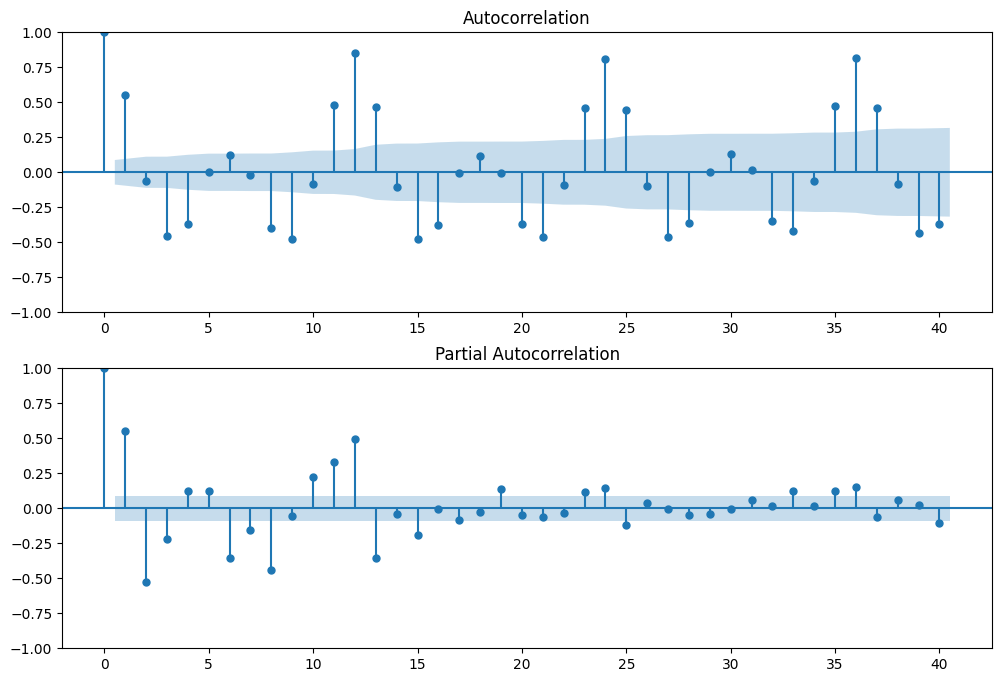

In [37]:
# - Find optimal parameters and build an ARIMA model
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(pte_trans.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(pte_trans.iloc[13:], lags=40, ax=ax2)

New Forecasting Model to account for Seasonality is SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous factors) model. Start by plugging the optimal parameter values into a new SARIMAX model

In [38]:
mod = sm.tsa.statespace.SARIMAX(pte,
                                order=(1,1,1),
                                seasonal_order=(0,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5155      0.049     10.599      0.000       0.420       0.611
ma.L1         -0.8992      0.026    -35.232      0.000      -0.949      -0.849
ma.S.L12      -0.7829      0.030    -25.820      0.000      -0.842      -0.723
sigma2        38.1341      2.106     18.104      0.000      34.006      42.262


# **Interpretable Analysis**

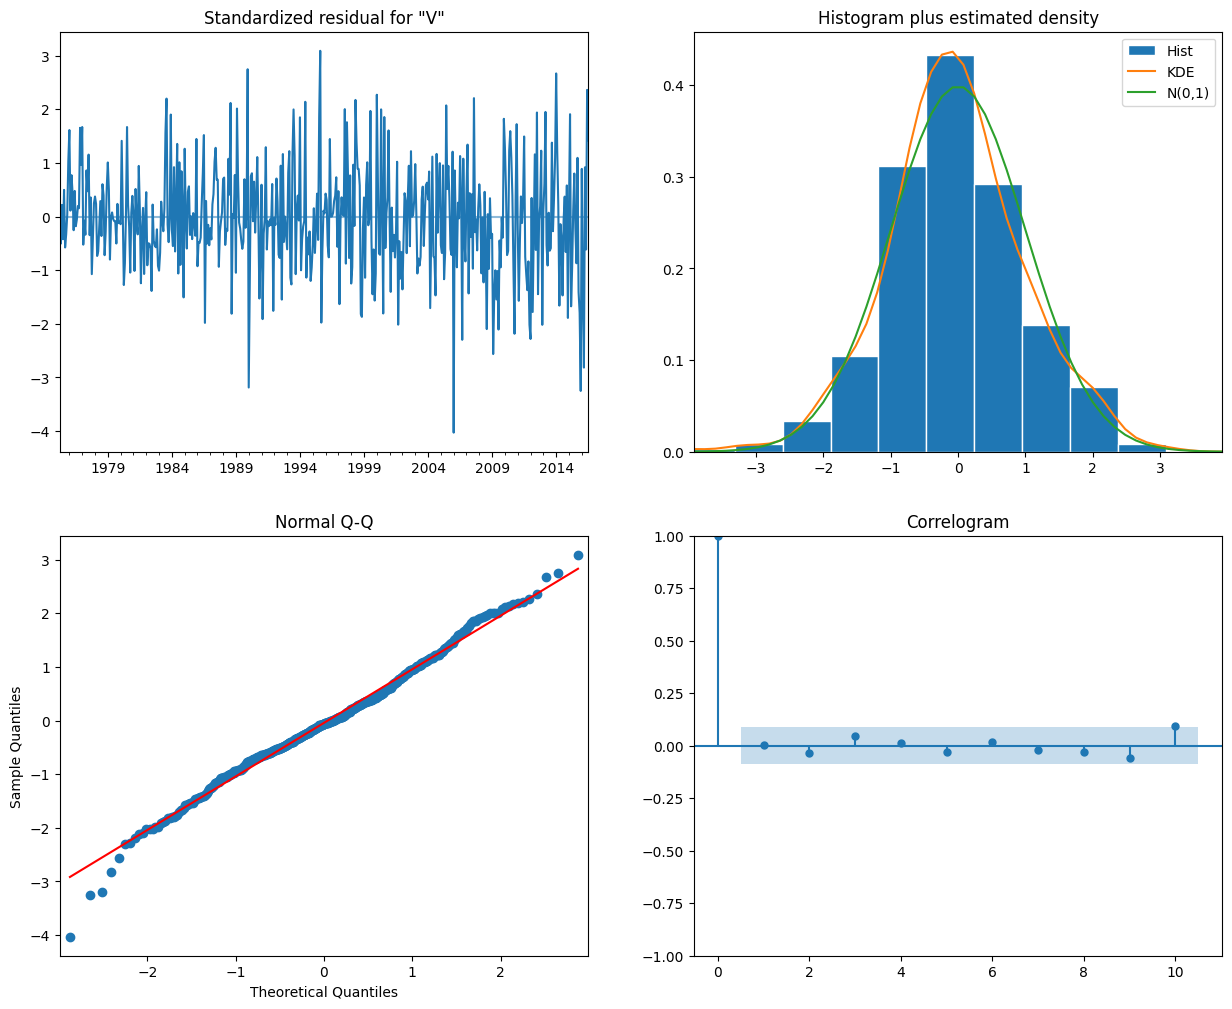

In [39]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

<Axes: ylabel='Density'>

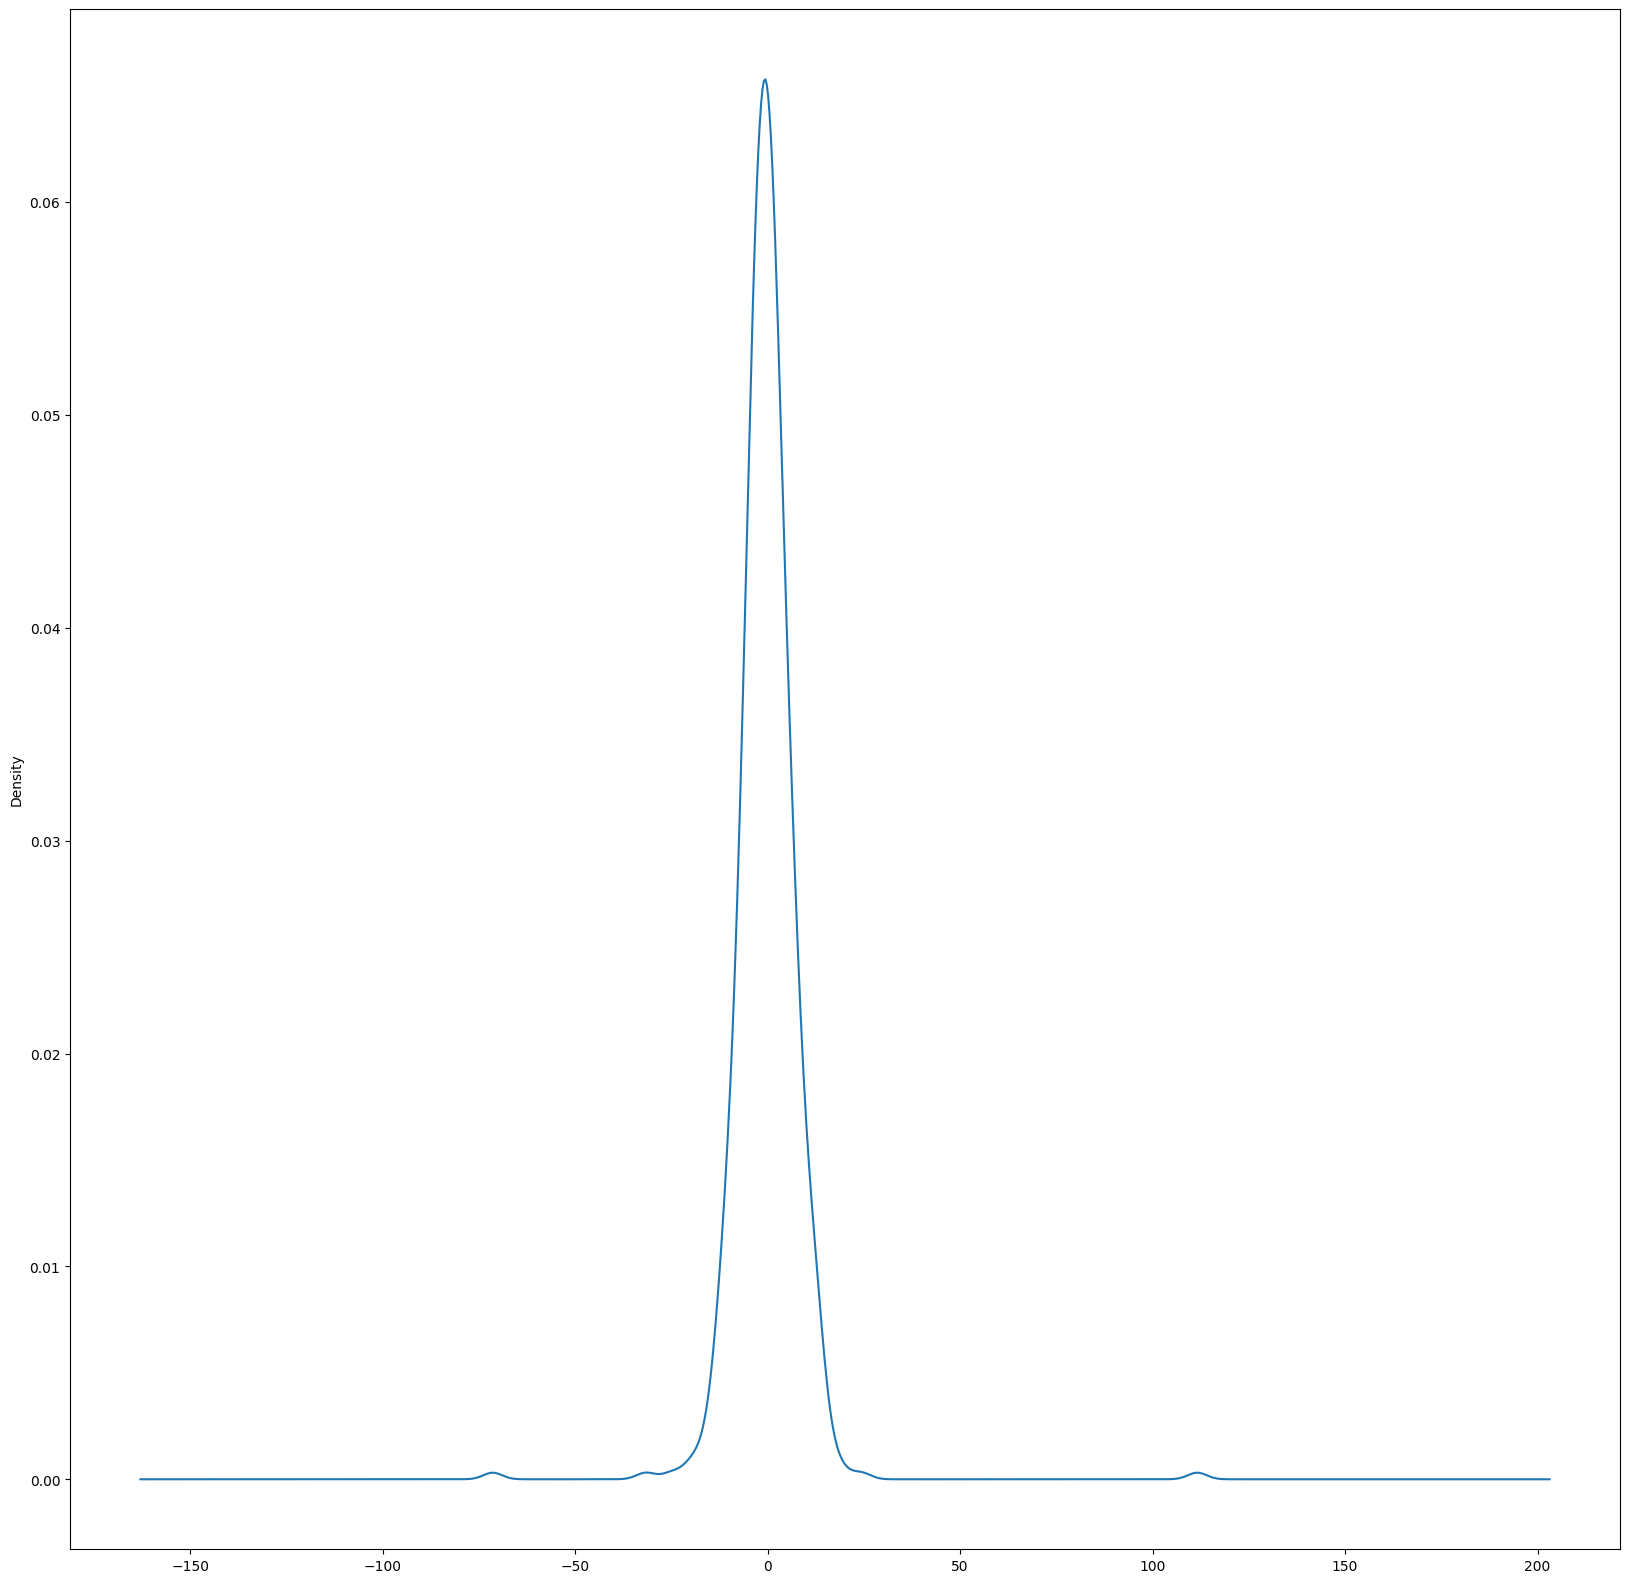

In [40]:
# gaussian residual error
results.resid.plot(kind='kde')

In [51]:
pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

lower Value  upper Value
1998-01-01   175.479524   199.686227
1998-02-01   148.958837   173.165531
1998-03-01   149.889992   174.096685
1998-04-01   144.293127   168.499819
1998-05-01   152.714928   176.921619

### **Plotting forecasted values of the time series**

In [52]:
ax = pte['1973':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.5)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time : Years')
ax.set_ylabel('CO2 Emissions')
plt.legend()

plt.show()

### **This App uses the SARIMAX model to forecast CO2 emissions**

In [55]:
import pandas as pd
from datetime import datetime

# Assuming 'results' is the fitted model object
# Ask the user for a prediction start date
user_date = input("Enter the start date for prediction (YYYY-MM-DD): ")

# Validate and parse the user input
try:
    start_date = pd.to_datetime(user_date, format='%Y-%m-%d')
except ValueError:
    print("Invalid date format. Please use YYYY-MM-DD.")
    raise

# Generate predictions starting from the user-provided date
pred = results.get_prediction(start=start_date, dynamic=False)
pred_ci = pred.conf_int()

# Rename the confidence interval columns for clarity
pred_ci.columns = [
    'Lower Limit (Million Metric Tons CO₂)',
    'Upper Limit (Million Metric Tons CO₂)'
]

# Display the labeled confidence intervals
print(pred_ci.head())


Enter the start date for prediction (YYYY-MM-DD): 2030-07-22
            Lower Limit (Million Metric Tons CO₂)  \
2030-08-01                              34.173408   

            Upper Limit (Million Metric Tons CO₂)  
2030-08-01                             214.885846  
